In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
overall_data = pd.read_csv('overall_data.csv')
print(overall_data.head())  

            PRESCRIPTION_ID                PATIENT_ID  \
0  6614201bb3fe6df48d3e92f0  6614201bb3fe6df48d3e92ed   
1  664cde23600e7e3f254eebdb  664cde23600e7e3f254eebd6   
2  6655fc2edb2d27ccb657f4ee  664cde23600e7e3f254eebd6   
3  667af276b220091a8df2cf80  667af276b220091a8df2cf7c   
4  65272a2a8fcaa8936d7ec02e  65272a2a8fcaa8936d7ec02a   

                  DOCTOR_ID  PRESCRIPTION_WRITTEN_AT            SPECIALTY  \
0  6614201bb3fe6df48d3e92e8  2024-04-05 16:00:00.000          Dermatology   
1  5d4c36f60f567e0001349e45  2024-05-21 16:00:00.000          Dermatology   
2  5d4c36f60f567e0001349e45  2024-05-27 16:00:00.000          Dermatology   
3  667af276b220091a8df2cf77  2024-06-24 16:00:00.000  Physician Assistant   
4  64919e368eacb3e62521fc66  2024-04-08 16:00:00.000  Physician Assistant   

               NAME   Primary_Speciality Sub_Speciality STATE_NAME STATE_CODE  \
0       Doctor Hema          Dermatology            NaN   Illinois         IL   
1  Doctor Armandina          Der

In [21]:
df = overall_data.copy()

In [22]:
print(df.shape)
refills = df.groupby(['PATIENT_ID',"PRESCRIPTION_ID"])["ORDER_ID"].count().reset_index()
refills.columns = ['PATIENT_ID', 'PRESCRIPTION_ID', 'Number_of_Fills']

# Filter for prescriptions with exactly 1 fill
count_fills = refills[refills['Number_of_Fills'] == 1]     
print(count_fills) 

# Assuming df is your DataFrame
order_id_distribution = refills['Number_of_Fills'].value_counts().reset_index()
order_id_distribution.columns = ['Number_of_Fills', 'Count']

# Display the distribution
print(order_id_distribution)

# Calculate how many unique patients have > 1 fill
# Calculate how many unique patients have more than 1 fill
patients_with_more_than_one_fill = refills[refills['Number_of_Fills'] > 1]['PATIENT_ID'].nunique()
print(f"\nNumber of unique patients with more than 1 fill: {patients_with_more_than_one_fill}")



(12022, 19)
                    PATIENT_ID           PRESCRIPTION_ID  Number_of_Fills
1     5ae35f264a029500a811ae92  6699605c8e800f17b44bad96                1
2     5b201e05ec7f5b00a93f2372  662be5a628b0f209c874e389                1
3     5b6afc45f4135f00b78e3aa0  65fe0a59cbeb659f0395f4cd                1
5     5bf30ccff9572800a9ac1a08  66aa9cba3faf04a33f35236a                1
7     5c50919b199fc800a9983fc4  65c6811947e11e9600d06e29                1
...                        ...                       ...              ...
8745  66ac182e9c098317c694234f  66ac182e9c098317c6942354                1
8746  66ac1a8f9c098317c6942908  66ac1a8f9c098317c694290d                1
8747  66ac1bb4ea51f591c50015eb  66ac1bb4ea51f591c50015ef                1
8748  66ac1f499c098317c69430ac  66ac1f4a9c098317c69430b1                1
8749  66ac21939c098317c6943374  66ac21949c098317c694337b                1

[6486 rows x 3 columns]
   Number_of_Fills  Count
0                1   6486
1                2   15

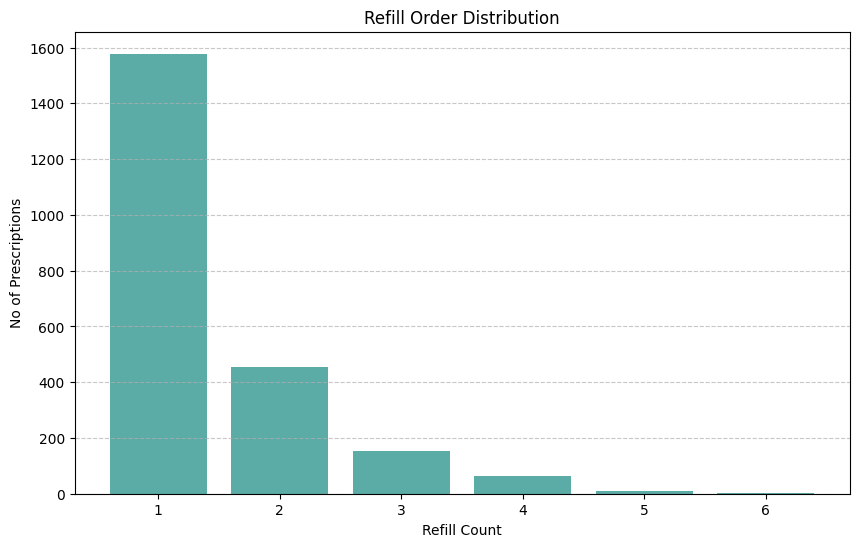

In [23]:
#Redo from Above: 
# Group by 'PRESCRIPTION_ID' and count the number of unique 'ORDER_ID'
unique_orders_per_prescription = overall_data.groupby(['DOCTOR_ID', 'PATIENT_ID','PRESCRIPTION_ID'])['ORDER_ID'].nunique().reset_index(name='Unique_Order_Count')

# Sort the DataFrame by 'Unique_Order_Count' in descending order
sorted_unique_orders_per_prescription = unique_orders_per_prescription.sort_values(by='Unique_Order_Count', ascending=False)

sorted_unique_orders_per_prescription['Unique_Order_Count']  -= 1

# Get the distribution of Unique_Order_Count
sorted_unique_orders_per_prescription = sorted_unique_orders_per_prescription[sorted_unique_orders_per_prescription['Unique_Order_Count'] >= 1]
distribution= sorted_unique_orders_per_prescription['Unique_Order_Count'].value_counts().sort_index()
import matplotlib.pyplot as plt

# Assuming 'distribution' is the Series with value counts
# Plot the distribution as a bar chart
plt.figure(figsize=(10, 6))
plt.bar(distribution.index, distribution.values, color='#5BAbA6')  # Bars colored in sky blue (#87CEEB)
plt.xlabel('Refill Count')
plt.ylabel('No of Prescriptions')
plt.title('Refill Order Distribution')
plt.xticks(distribution.index)  # Show all unique order count values on x-axis
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



In [24]:
## PDC
df_pdc = overall_data.copy()



In [25]:
# Select columns to keep
columns_to_keep = ['PRESCRIPTION_ID', 'PATIENT_ID', 'DOCTOR_ID', 'ORDER_ID', 'PRESCRIPTION_WRITTEN_AT', 'DAYS_OF_SUPPLY', 
                   'CREATED_AT', 'SHIPPED_AT']

# Filter DataFrame to keep only the specified columns
df_filtered = df[columns_to_keep]

# Pivoting the DataFrame
pivoted_df = df_filtered.pivot(index=['PRESCRIPTION_ID', 'PATIENT_ID', 'DOCTOR_ID'],
                      columns= ['DAYS_OF_SUPPLY', 'CREATED_AT', 'PRESCRIPTION_WRITTEN_AT'], 
                      values=[ 'DAYS_OF_SUPPLY', 'CREATED_AT', 'PRESCRIPTION_WRITTEN_AT'])
print(pivoted_df)   

                                                                                    DAYS_OF_SUPPLY  \
DAYS_OF_SUPPLY                                                                                30.0   
CREATED_AT                                                                 2024-04-08 16:49:31.934   
PRESCRIPTION_WRITTEN_AT                                                    2024-04-05 16:00:00.000   
PRESCRIPTION_ID          PATIENT_ID               DOCTOR_ID                                          
65206663bbb745a8a0f93098 65206663bbb745a8a0f93094 5da4a286bfdf7c0001b42339                     NaN   
6520873bbbb745a8a0f99d36 6520873bbbb745a8a0f99d31 6520873bbbb745a8a0f99d2b                     NaN   
652558ae91854a1deb6055a6 652558ae91854a1deb6055a2 66056c0666844f967401d576                     NaN   
6525b2b879ff92e295b1a048 6525b2b879ff92e295b1a044 651b50f5990eb295fa837f78                     NaN   
65272a2a8fcaa8936d7ec02e 65272a2a8fcaa8936d7ec02a 64919e368eacb3e62521fc66        

In [26]:
mpr = pd.read_excel('MPR2.xlsx')

In [27]:
mpr_combined = pd.merge(overall_data, mpr, on='PATIENT_ID', how='inner')
columns_to_keep_1 = ['PRESCRIPTION_ID', 'PATIENT_ID', 'DOCTOR_ID', 'ORDER_ID', 'DAYS_OF_SUPPLY', 'AGE','Age_Group', 'MPR']
mpr_combined = mpr_combined[columns_to_keep_1]
print(mpr_combined.head())      

            PRESCRIPTION_ID                PATIENT_ID  \
0  6614201bb3fe6df48d3e92f0  6614201bb3fe6df48d3e92ed   
1  664cde23600e7e3f254eebdb  664cde23600e7e3f254eebd6   
2  6655fc2edb2d27ccb657f4ee  664cde23600e7e3f254eebd6   
3  667af276b220091a8df2cf80  667af276b220091a8df2cf7c   
4  65272a2a8fcaa8936d7ec02e  65272a2a8fcaa8936d7ec02a   

                  DOCTOR_ID                  ORDER_ID  DAYS_OF_SUPPLY   AGE  \
0  6614201bb3fe6df48d3e92e8  6614201bb3fe6df48d3e92f1            30.0  23.0   
1  5d4c36f60f567e0001349e45  664cde23600e7e3f254eebdc            30.0  45.0   
2  5d4c36f60f567e0001349e45  6655fc2edb2d27ccb657f4ef            30.0  45.0   
3  667af276b220091a8df2cf77  667af276b220091a8df2cf81            30.0  35.0   
4  64919e368eacb3e62521fc66  65e03e6f713fbc7bd8c76e4b            30.0  18.0   

                     Age_Group       MPR  
0    Young Adult (18-24 years)  0.272727  
1  Mid Adulthood (35-49 years)  0.422535  
2  Mid Adulthood (35-49 years)  0.422535  
3  Mid Adu

In [28]:
mpr_new = mpr_combined.groupby(['PATIENT_ID','AGE' ,'Age_Group'])['MPR'].mean().reset_index()
# Drop rows where MPR = 0
mpr_new = mpr_new[mpr_new['MPR'] != 0]
print(mpr_new.head())   

                  PATIENT_ID   AGE                      Age_Group       MPR
0   5a83288837fb1000a85ab4fe  26.0  Early Adulthood (25-34 years)  1.022727
4   5bce01cd0bd67300a91debc5  33.0  Early Adulthood (25-34 years)  1.538462
6   5c0eb790fc03a200a9e4307c  23.0      Young Adult (18-24 years)  0.530973
9   5caf5f2efa134900aa626501  53.0   Late Adulthood (50-64 years)  0.384615
10  5cdab7cc16a28f00aae31d25  20.0      Young Adult (18-24 years)  2.000000


In [29]:
# Calculate the average MPR for each age group
average_mpr_by_age_group = mpr_new.groupby('Age_Group')['MPR'].mean().reset_index()
print(average_mpr_by_age_group)


                       Age_Group       MPR
0  Early Adulthood (25-34 years)  1.027143
1   Late Adulthood (50-64 years)  0.992153
2   Late Elementary (9-11 years)  0.333333
3    Mid Adulthood (35-49 years)  0.981274
4             Senior (65+ years)  1.131349
5         Teenager (12-17 years)  1.054629
6      Young Adult (18-24 years)  1.024210


In [30]:
# Create brackets for MPR (0-0.25, 0.25-0.5, 0.5-0.75, 0.75-1.0, 1.0 and above)
mpr_new['MPR_Bracket'] = pd.cut(mpr_new['MPR'], bins=[0, 0.25, 0.5, 0.75, 1.0, 2.0], labels=['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1.0', '1.0 and above'])
print(mpr_new.head())


                  PATIENT_ID   AGE                      Age_Group       MPR  \
0   5a83288837fb1000a85ab4fe  26.0  Early Adulthood (25-34 years)  1.022727   
4   5bce01cd0bd67300a91debc5  33.0  Early Adulthood (25-34 years)  1.538462   
6   5c0eb790fc03a200a9e4307c  23.0      Young Adult (18-24 years)  0.530973   
9   5caf5f2efa134900aa626501  53.0   Late Adulthood (50-64 years)  0.384615   
10  5cdab7cc16a28f00aae31d25  20.0      Young Adult (18-24 years)  2.000000   

      MPR_Bracket  
0   1.0 and above  
4   1.0 and above  
6        0.5-0.75  
9        0.25-0.5  
10  1.0 and above  


In [31]:
# Age Group in Rows and MP Bracket in Columns, fill value with count of Patient_ID
age_group_mpr_pivot = mpr_new.pivot_table(index='Age_Group', columns='MPR_Bracket', values='PATIENT_ID', aggfunc='count', fill_value=0)
print(age_group_mpr_pivot)

MPR_Bracket                    0-0.25  0.25-0.5  0.5-0.75  0.75-1.0  \
Age_Group                                                             
Early Adulthood (25-34 years)      68       267       262       132   
Late Adulthood (50-64 years)       15        58        53        23   
Late Elementary (9-11 years)        0         1         0         0   
Mid Adulthood (35-49 years)        74       263       200       108   
Senior (65+ years)                  2         2         2         0   
Teenager (12-17 years)             44       127       152        96   
Young Adult (18-24 years)          72       265       251       166   

MPR_Bracket                    1.0 and above  
Age_Group                                     
Early Adulthood (25-34 years)            320  
Late Adulthood (50-64 years)              55  
Late Elementary (9-11 years)               0  
Mid Adulthood (35-49 years)              240  
Senior (65+ years)                         6  
Teenager (12-17 years)         

In [32]:
age_group_mpr_pivot.to_csv('age_group_mpr_pivot.csv', index=True)


In [33]:
pdc = pd.read_csv('merged.csv')
print(pdc.head())

pdc_combined = pd.merge(overall_data, pdc, on='PATIENT_ID', how='inner')
columns_to_keep_2 = ['PRESCRIPTION_ID', 'PATIENT_ID', 'DOCTOR_ID', 'ORDER_ID', 'DAYS_OF_SUPPLY', 'AGE','Age_Group', 'PDC']
pdc_combined = pdc_combined[columns_to_keep_2]
print(pdc_combined.head())   

pdc_new = pdc_combined.groupby(['PATIENT_ID','AGE' ,'Age_Group'])['PDC'].mean().reset_index()
# Drop rows where PDC = 0
pdc_new = pdc_new[pdc_new['PDC'] != 0]
print(pdc_new.head()) 

                 PATIENT_ID  Total_Days_Of_Supply         First_Shipped_At  \
0  5a83288837fb1000a85ab4fe                  90.0  2024-05-11 21:49:10.785   
1  5bce01cd0bd67300a91debc5                  60.0  2024-06-29 21:12:42.133   
2  5c0eb790fc03a200a9e4307c                  60.0  2024-04-16 18:06:17.144   
3  5caf5f2efa134900aa626501                  30.0  2024-05-21 16:53:19.094   
4  5cdab7cc16a28f00aae31d25                  60.0  2024-07-08 17:23:17.839   

           Last_Shipped_At  Total_Days        MPR        PDC  
0  2024-07-02 22:25:16.359        82.0  41.474654  37.788018  
1  2024-07-26 21:22:37.573        57.0  27.649770  26.267281  
2  2024-05-10 16:08:09.357        53.0  27.649770  24.423963  
3  2024-05-21 16:53:19.094        30.0  13.824885  13.824885  
4  2024-08-01 20:19:14.151        54.0  27.649770  24.884793  
            PRESCRIPTION_ID                PATIENT_ID  \
0  6614201bb3fe6df48d3e92f0  6614201bb3fe6df48d3e92ed   
1  664cde23600e7e3f254eebdb  664cde2360

In [34]:
# average_pdc_by_age_group = pdc_new.groupby('Age_Group')['PDC'].mean().reset_index()
# print(average_pdc_by_age_group)

pdc_1 = pdc_new.copy()
pdc_1['PDC'] = pdc_1['PDC'] / 100

# Apply your original code here
pdc_1['PDC_Bracket'] = pd.cut(pdc_1['PDC'], bins=[0, 0.25, 0.5, 0.75, 1.0], labels=['0-0.25', '0.25-0.5', '0.5-0.75', '0.75-1.0'])
print(pdc_1.head())

age_group_pdc_pivot = pdc_1.pivot_table(index='Age_Group', columns='PDC_Bracket', values='PATIENT_ID', aggfunc='count', fill_value=0)
print(age_group_pdc_pivot)

                 PATIENT_ID   AGE                      Age_Group       PDC  \
0  5a83288837fb1000a85ab4fe  26.0  Early Adulthood (25-34 years)  0.377880   
1  5bce01cd0bd67300a91debc5  33.0  Early Adulthood (25-34 years)  0.262673   
2  5c0eb790fc03a200a9e4307c  23.0      Young Adult (18-24 years)  0.244240   
3  5caf5f2efa134900aa626501  53.0   Late Adulthood (50-64 years)  0.138249   
4  5cdab7cc16a28f00aae31d25  20.0      Young Adult (18-24 years)  0.248848   

  PDC_Bracket  
0    0.25-0.5  
1    0.25-0.5  
2      0-0.25  
3      0-0.25  
4      0-0.25  
PDC_Bracket                    0-0.25  0.25-0.5  0.5-0.75  0.75-1.0
Age_Group                                                          
Early Adulthood (25-34 years)     798       285        73         4
Late Adulthood (50-64 years)      162        54         7         1
Late Elementary (9-11 years)        1         0         0         0
Mid Adulthood (35-49 years)       702       201        62         7
Senior (65+ years)         

In [35]:
age_group_pdc_pivot.to_csv('age_group_pdc_pivot.csv', index=True)

In [36]:
# Calculate PDC for each age group
average_pdc_by_age_group = pdc_new.groupby('Age_Group')['PDC'].mean().reset_index()
print(average_pdc_by_age_group)

                       Age_Group        PDC
0  Early Adulthood (25-34 years)  22.589385
1   Late Adulthood (50-64 years)  20.848420
2   Late Elementary (9-11 years)  13.824885
3    Mid Adulthood (35-49 years)  21.838672
4             Senior (65+ years)  22.828784
5         Teenager (12-17 years)  23.057431
6      Young Adult (18-24 years)  22.963762


In [56]:
import pandas as pd

# Assuming overall_data is already defined and imported
df = overall_data.copy()

# Convert 'PRESCRIPTION_WRITTEN_AT' to datetime
df['PRESCRIPTION_WRITTEN_AT'] = pd.to_datetime(df['PRESCRIPTION_WRITTEN_AT'])

# Separate the date and time
df['PRESCRIPTION_WRITTEN_AT'] = df['PRESCRIPTION_WRITTEN_AT'].dt.date

# Given date for classification
given_date = pd.to_datetime('2024-04-05').date()  # Convert to datetime.date

# Create a DataFrame for the given date
given_date_df = df[df['PRESCRIPTION_WRITTEN_AT'] == given_date]

# Check if doctors on the given date have been active on previous dates
doctors_before = df[df['PRESCRIPTION_WRITTEN_AT'] < given_date]['DOCTOR_ID'].unique()

# Classify doctors
given_date_df['CLASSIFICATION'] = given_date_df['DOCTOR_ID'].apply(lambda x: 'existing' if x in doctors_before else 'new')

# Columns to keep in the final DataFrame
columns_to_keep = ['PRESCRIPTION_ID', 'DOCTOR_ID', 'PRESCRIPTION_WRITTEN_AT', 'CLASSIFICATION']
given_date_df = given_date_df[columns_to_keep]

print(given_date_df.head())


               PRESCRIPTION_ID                 DOCTOR_ID  \
0     6614201bb3fe6df48d3e92f0  6614201bb3fe6df48d3e92e8   
588   6614615f096bd7ed552b3618  6614615e096bd7ed552b360f   
847   66157762096bd7ed55301b56  66157761096bd7ed55301b3f   
1031  66215a1fcac8d8a8a9643e2b  5b3d297ac3476800aabb6c09   
1131  6610044c4aa01db08589fefc  65eb2216d8266decb65b1ed0   

     PRESCRIPTION_WRITTEN_AT CLASSIFICATION  
0                 2024-04-05            new  
588               2024-04-05            new  
847               2024-04-05            new  
1031              2024-04-05            new  
1131              2024-04-05       existing  


/var/folders/8j/cxcrfj5d1496b666971py8pr0000gn/T/ipykernel_89992/1062512971.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  given_date_df['CLASSIFICATION'] = given_date_df['DOCTOR_ID'].apply(lambda x: 'existing' if x in doctors_before else 'new')


In [59]:
import pandas as pd

# Assuming overall_data is already defined and imported
df = overall_data.copy()

# Convert 'PRESCRIPTION_WRITTEN_AT' to datetime
df['PRESCRIPTION_WRITTEN_AT'] = pd.to_datetime(df['PRESCRIPTION_WRITTEN_AT'])

# Separate the date
df['PRESCRIPTION_WRITTEN_AT'] = df['PRESCRIPTION_WRITTEN_AT'].dt.date

# Get unique dates
unique_dates = df['PRESCRIPTION_WRITTEN_AT'].unique()

# Initialize an empty list to store results
results = []

# Iterate over each unique date
for date in unique_dates:
    # Create a DataFrame for the current date
    given_date_df = df[df['PRESCRIPTION_WRITTEN_AT'] == date].copy()
    
    # Check if doctors on the current date have been active on previous dates
    doctors_before = df[df['PRESCRIPTION_WRITTEN_AT'] < date]['DOCTOR_ID'].unique()
    
    # Classify doctors
    given_date_df.loc[:, 'CLASSIFICATION'] = given_date_df['DOCTOR_ID'].apply(lambda x: 'existing' if x in doctors_before else 'new')
    
    # Add the current date to the DataFrame
    given_date_df.loc[:, 'REFERENCE_DATE'] = date
    
    # Append to results list
    results.append(given_date_df)

# Combine all results into a single DataFrame
final_df = pd.concat(results, ignore_index=True)

# Columns to keep in the final DataFrame
columns_to_keep = ['PRESCRIPTION_ID', 'DOCTOR_ID', 'PRESCRIPTION_WRITTEN_AT', 'CLASSIFICATION', 'REFERENCE_DATE']
final_df = final_df[columns_to_keep]

# Group by REFERENCE_DATE and CLASSIFICATION and count the number of occurrences
summary_df = final_df.groupby(['REFERENCE_DATE', 'CLASSIFICATION']).size().unstack(fill_value=0).reset_index()

# Rename columns for clarity
summary_df.columns.name = None
summary_df = summary_df.rename(columns={'new': 'New_Doctors', 'existing': 'Existing_Doctors'})

print(summary_df)


    REFERENCE_DATE  Existing_Doctors  New_Doctors
0       2024-01-02                 0           10
1       2024-01-03                 0           11
2       2024-01-04                 0            5
3       2024-01-05                 0            7
4       2024-01-08                 0            9
..             ...               ...          ...
183     2024-07-29                80            4
184     2024-07-30                96            2
185     2024-07-31               111            1
186     2024-08-01                92            0
187     2024-08-02                 6            2

[188 rows x 3 columns]


In [65]:
import pandas as pd

# Sample data assuming overall_data is already defined and imported
df = overall_data.copy()

# Convert 'PRESCRIPTION_WRITTEN_AT' to datetime if not already done
df['PRESCRIPTION_WRITTEN_AT'] = pd.to_datetime(df['PRESCRIPTION_WRITTEN_AT'])

# Separate the date
df['PRESCRIPTION_WRITTEN_AT'] = df['PRESCRIPTION_WRITTEN_AT'].dt.date

# Define the dates for which you want to print the DOCTOR_IDs
dates_of_interest = ['2024-01-02', '2024-01-03']

# Loop through the dates and print DOCTOR_IDs
for date in dates_of_interest:
    # Filter the DataFrame for the specific date
    doctors_on_date = df[df['PRESCRIPTION_WRITTEN_AT'] == pd.to_datetime(date).date()]['DOCTOR_ID'].unique()
    
    # Print the DOCTOR_IDs
    print(f"DOCTOR_IDs who gave prescriptions on {date}: {doctors_on_date}")

# Check if any doctor is common between the two dates
common_doctors = df[df['PRESCRIPTION_WRITTEN_AT'].isin(dates_of_interest)]['DOCTOR_ID'].value_counts()
common_doctors = common_doctors[common_doctors == 2].index.tolist()
print(f"\nDOCTOR_IDs who gave prescriptions on both dates: {common_doctors}")

DOCTOR_IDs who gave prescriptions on 2024-01-02: ['5b3f9d60c6d59f00a9fc4484' '6594713140b47551261d2c6d'
 '5e6a270b10a8d10001888ae2' '660724deb6157ed0b04e1e4b'
 '65e6705823568e39ce716321']
DOCTOR_IDs who gave prescriptions on 2024-01-03: ['5db99e728e951e00014a6a6e' '660ea800c217c4c7bd0fc1ff'
 '65986929280780e3d11eee00' '65f9d11fb8e2c65b0af5a115'
 '661eb73cba12b268aaae20d8' '597679c4b2dd1500af16bcd6'
 '65f20210be836935a66a7104']

DOCTOR_IDs who gave prescriptions on both dates: []


In [67]:
import pandas as pd

# Assuming final_df is already defined and includes 'REFERENCE_DATE', 'DOCTOR_ID', and 'CLASSIFICATION'
# Step 1: Identify the periods
dates = final_df['REFERENCE_DATE'].unique()
dates.sort()

# Step 2: Create a dictionary to track doctor activity
doctor_activity = {}
churn_data = []

for date in dates:
    current_doctors = set(final_df[final_df['REFERENCE_DATE'] == date]['DOCTOR_ID'])
    if date not in doctor_activity:
        doctor_activity[date] = {'current': current_doctors, 'previous': set()}

    # Calculate churn
    if date > dates[0]:
        previous_date = dates[dates.tolist().index(date) - 1]
        previous_doctors = doctor_activity[previous_date]['current']
        if previous_doctors:  # Avoid division by zero
            churned_doctors = previous_doctors - current_doctors
            churn_rate = len(churned_doctors) / len(previous_doctors) * 100
            churn_data.append({'DATE': date, 'CHURN_RATE': churn_rate})

    # Update the dictionary
    doctor_activity[date]['previous'] = current_doctors

# Convert churn data to DataFrame
churn_df = pd.DataFrame(churn_data)

print(churn_df)


           DATE  CHURN_RATE
0    2024-01-03  100.000000
1    2024-01-04  100.000000
2    2024-01-05  100.000000
3    2024-01-08  100.000000
4    2024-01-09  100.000000
..          ...         ...
182  2024-07-29   50.000000
183  2024-07-30   86.567164
184  2024-07-31   83.950617
185  2024-08-01   88.888889
186  2024-08-02   98.630137

[187 rows x 2 columns]


In [69]:
# Combine two dataframes summary_df and churn_df on date column
combined_df = pd.merge(summary_df, churn_df, left_on='REFERENCE_DATE', right_on='DATE', how='left')

# Drop the 'DATE' column
combined_df.drop('DATE', axis=1, inplace=True)

print(combined_df)


    REFERENCE_DATE  Existing_Doctors  New_Doctors  CHURN_RATE
0       2024-01-02                 0           10         NaN
1       2024-01-03                 0           11  100.000000
2       2024-01-04                 0            5  100.000000
3       2024-01-05                 0            7  100.000000
4       2024-01-08                 0            9  100.000000
..             ...               ...          ...         ...
183     2024-07-29                80            4   50.000000
184     2024-07-30                96            2   86.567164
185     2024-07-31               111            1   83.950617
186     2024-08-01                92            0   88.888889
187     2024-08-02                 6            2   98.630137

[188 rows x 4 columns]


In [70]:
# Count the number of prescriptions per doctor
prescriptions_per_doctor = df.groupby('DOCTOR_ID').size()
print(prescriptions_per_doctor)

# Calculate the average number of prescriptions per doctor
average_prescriptions = prescriptions_per_doctor.mean()
print(f'Average Number of Prescriptions Per Doctor: {average_prescriptions:.2f}')


DOCTOR_ID
591f3de2204e8600af0cfe92    2
595d53868d76d200b049bce7    1
595fbc4b23bcab00af31992d    2
59664f608e58c600b264ee00    8
596920c89a00ef00afc46561    1
                           ..
66a419f018ebca2e87996de0    1
66a7fb30b926b8a916cbdd6f    1
66a80d73b926b8a916cc332e    2
66a92309323ec984325dee23    1
66ad40d33a8f7c2d8a2604bc    1
Length: 2277, dtype: int64
Average Number of Prescriptions Per Doctor: 5.28


In [71]:
combined_df.to_csv('NEW_EXITING_DOCTORS.csv', index=False)